In [2]:
import numpy as np 


import os 
import librosa
from matplotlib import pyplot as plt 
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import *

print(os.listdir('./input/notes'))

['(Scale1) Do.wav', '(Scale2) Re.wav', '(Scale3) Mi.wav', '(Scale4) Fa.wav', '(Scale5) So.wav', '(Scale6) La.wav', '(Scale7) Ti.wav', '(Scale8) Do.wav', 'A0.wav', 'A1.wav', 'A2.wav', 'A3.wav', 'A4.wav', 'A5.wav', 'A6.wav', 'A7.wav', 'A8.wav', 'B0.wav', 'B1.wav', 'B2.wav', 'B3.wav', 'B4.wav', 'B5.wav', 'B6.wav', 'B7.wav', 'B8.wav', 'D0.wav', 'D1.wav', 'D2.wav', 'D3.wav', 'D4.wav', 'D5.wav', 'D6.wav', 'D7.wav', 'D8.wav', 'Ehi0.wav', 'Ehi1.wav', 'Ehi2.wav', 'Ehi3.wav', 'Ehi4.wav', 'Ehi5.wav', 'Ehi6.wav', 'Ehi7.wav', 'Ehi8.wav', 'Elo0.wav', 'Elo1.wav', 'Elo2.wav', 'Elo3.wav', 'Elo4.wav', 'Elo5.wav', 'Elo6.wav', 'Elo7.wav', 'Elo8.wav', 'G0.wav', 'G1.wav', 'G2.wav', 'G3.wav', 'G4.wav', 'G5.wav', 'G6.wav', 'G7.wav', 'G8.wav']


In [3]:
sound_files_list = os.listdir('./input/notes/')

In [4]:
sound_label = []
sound_data = []
raw_data = []
base_dir = './input/notes/'
mfcc_singular_list = list()

for file in sound_files_list:
    temp_audio_data = list()
    audio_data, samplerate = librosa.core.load(base_dir + file, res_type='kaiser_fast')
    raw_data.append(audio_data)
    spectral_data = librosa.feature.spectral_bandwidth(y=audio_data, sr=samplerate)
    
    for sd in spectral_data:
        temp_audio_data.append(sd)
    
    sound_data.append(temp_audio_data)
    sound_label.append(str.split(file, '.')[0])
    
print(sound_label)

['(Scale1) Do', '(Scale2) Re', '(Scale3) Mi', '(Scale4) Fa', '(Scale5) So', '(Scale6) La', '(Scale7) Ti', '(Scale8) Do', 'A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'Ehi0', 'Ehi1', 'Ehi2', 'Ehi3', 'Ehi4', 'Ehi5', 'Ehi6', 'Ehi7', 'Ehi8', 'Elo0', 'Elo1', 'Elo2', 'Elo3', 'Elo4', 'Elo5', 'Elo6', 'Elo7', 'Elo8', 'G0', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8']


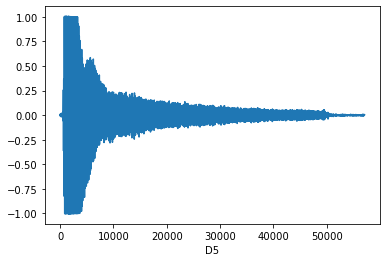

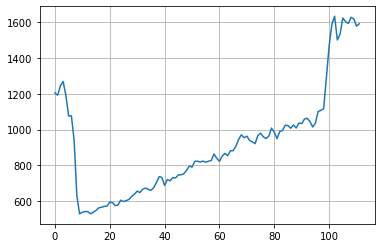

In [5]:
idx = np.random.randint(len(sound_data))
plt.plot(raw_data[idx])
plt.xlabel(sound_label[idx])
plt.show()
plt.plot(sound_data[idx][0])
plt.grid()
plt.show()

In [6]:
X = []

for s in sound_data:
    for val in s:
        X.append(val)

In [7]:
print(max([len(x) for x in X]))
max_len = max([len(x) for x in X])

X = pad_sequences(X, maxlen=max_len)
np.shape(X)
X

154


array([[   0,    0,    0, ..., 1426, 1400, 1325],
       [   0,    0,    0, ..., 1231, 1217, 1204],
       [   0,    0,    0, ..., 1346, 1352, 1415],
       ...,
       [   0,    0,    0, ..., 1658, 1762, 1861],
       [   0,    0,    0, ..., 1636, 1627, 1652],
       [   0,    0,    0, ..., 1641, 1670, 1793]])

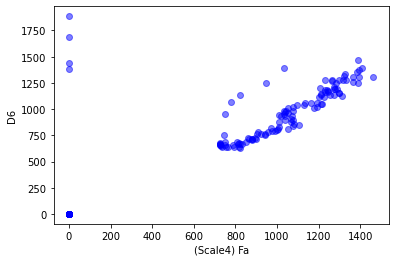

In [8]:
idx1,idx2=np.random.randint(len(X)),np.random.randint(len(X))
plt.scatter(X[idx1],X[idx2], c='b', alpha=0.5)
plt.xlabel(sound_label[idx1])
plt.ylabel(sound_label[idx2])
plt.show()

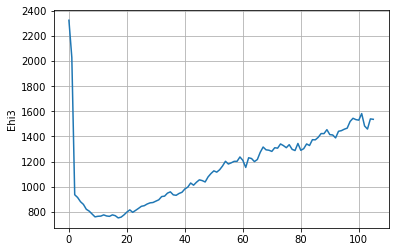

In [9]:
idx = np.random.randint(len(X))
plt.plot(sound_data[idx][0])
plt.ylabel(sound_label[idx])
plt.grid()
plt.show()

In [10]:
np.shape(X)

(62, 154)

In [11]:
num_classes = len(set(sound_label))
num_classes

62

In [12]:
target_label_encoder = LabelEncoder()
y = target_label_encoder.fit_transform(sound_label)

In [13]:
print(f'"X" shape: {np.shape(X)}\n"Y" shape: {np.shape(y)}')

"X" shape: (62, 154)
"Y" shape: (62,)


In [14]:
from sklearn.svm import SVC

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,test_size=0.20,random_state=42)
svc_clf = SVC()
svc_clf.fit(X, y)

print(f'Accuracy: {svc_clf.score(X_test, y_test)}')

Accuracy: 1.0


In [17]:
idx=np.random.randint(len(X_test))
print('Pred:',target_label_encoder.inverse_transform(svc_clf.predict([X_test[idx]]))[0])
print('Actual:',*target_label_encoder.inverse_transform(y_test.reshape(-1,1)[idx]))
X_test

Pred: Elo6
Actual: Elo6


array([[   0,    0,    0, ..., 1415, 1411, 1531],
       [   0,    0,    0, ..., 1692, 1600, 1520],
       [   0,    0,    0, ..., 1426, 1400, 1325],
       ...,
       [   0,    0,    0, ..., 1594, 1540, 1479],
       [   0,    0,    0, ..., 1404, 1426, 1463],
       [   0,    0,    0, ..., 1209, 1221, 1302]])